In [9]:
# Import libraries

import math
import numpy as np
import scipy.stats

from matplotlib import pyplot as plt


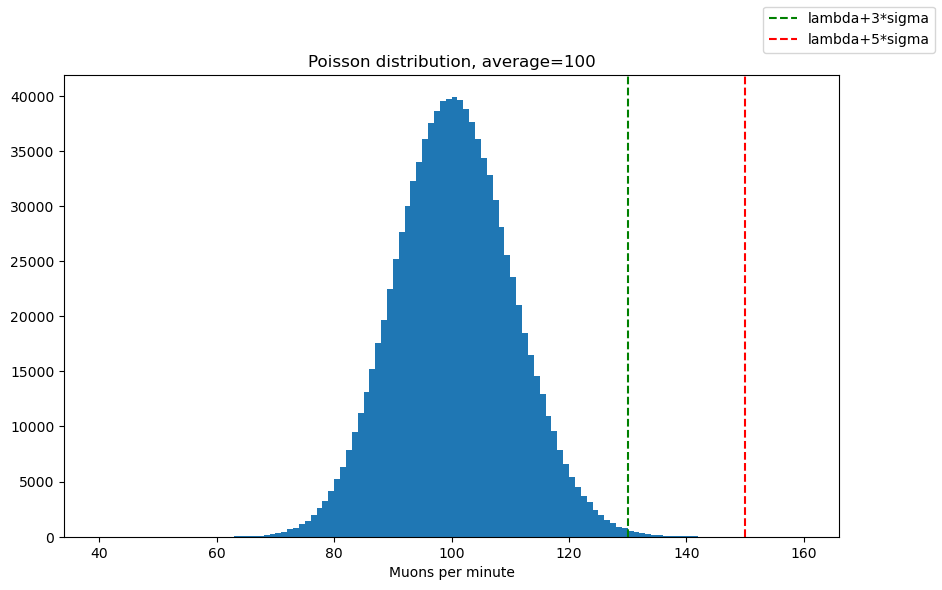

In [10]:
average_count: int = 100 # counts/min
sigma: float = math.sqrt(average_count)
simulation_time: int = 1000000 # minutes

# Simulate 1000 minutes of data
data = np.random.poisson(average_count, simulation_time)
lower_limit: int = int(average_count-6*sigma)
upper_limit: int = int(average_count+6*sigma)
nbins: int = upper_limit - lower_limit

fig = plt.figure(figsize=(10, 6))
ax = plt.hist(data, nbins, (lower_limit, upper_limit))
plt.title(f'Poisson distribution, average={average_count}')
plt.xlabel('Muons per minute')
plt.axvline(x=(average_count+3*sigma), color='green', linestyle='--', label='lambda+3*sigma')
plt.axvline(x=(average_count+5*sigma), color='red', linestyle='--', label='lambda+5*sigma')
fig.legend()

plt.show()

In [13]:
# Probability of count being part of the background
p_value_3sigma: float = scipy.stats.poisson.sf(average_count+3*sigma -1, average_count)
p_value_5sigma: float = scipy.stats.poisson.sf(average_count+5*sigma -1, average_count)
print(f'Probability of finding count >= {average_count+3*sigma}: {p_value_3sigma:.2e}')
print(f'Probability of finding count >= {average_count+5*sigma}: {p_value_5sigma:.2e}')

Probability of finding count >= 130.0: 2.28e-03
Probability of finding count >= 150.0: 1.88e-06
